### merge
  

>merge and <b>compare</b> projects by stamp and reagent and generated by 02.sample.1  
(evaluated results of projects are given by the pickle files)

In [8]:
import os
import pandas as pd
import socket, datetime

fprojects = [
  ("Nitrit NO2","2023-06-13"),
  ("Nitrit NO2","2023-06-14")
]

metric = "euclidean"
space = "lab"

columns = ["project","index","label","metric","space"] + list(space)
data = pd.DataFrame(columns=columns)

for fproject in fprojects:

  fpath = os.path.join(os.getcwd(),"data",fproject[1],fproject[0],"result")
  fname = os.path.join(fpath,"%s.%s.values.pickle"%(space,metric))  
  frame = pd.read_pickle(fname)

  frame['project'] = "_".join(fproject)
  frame['date'] = fproject[1]
  data = pd.concat([data,frame])
                   
data.reset_index(drop=True,inplace=True)

print(f"author  {socket.gethostname():>28}")
print(f"version {str(datetime.datetime.now()):>28}")


author                           NOB
version   2023-08-20 04:19:24.550497


### document
  
>for further evaluation of the results plot into a <b>pdf</b> document  
(the pdf filename prefix is given by the project names chain)

In [9]:
fprefix = ".".join(["_".join(fproject) for fproject in fprojects])

print("document prefix", fprefix)

document prefix Nitrit NO2_2023-06-13.Nitrit NO2_2023-06-14


In [10]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages(os.path.join(os.getcwd(),"eval","%s.%s.%s.pdf"%(fprefix,space,metric)))

### compare

visual compare by the project specific  
>color space trajectories and  
pair plotting  

>the pair plotting shows the tendence of the given two NO2 projects  
transformation is given by the measurement differences in concentration  

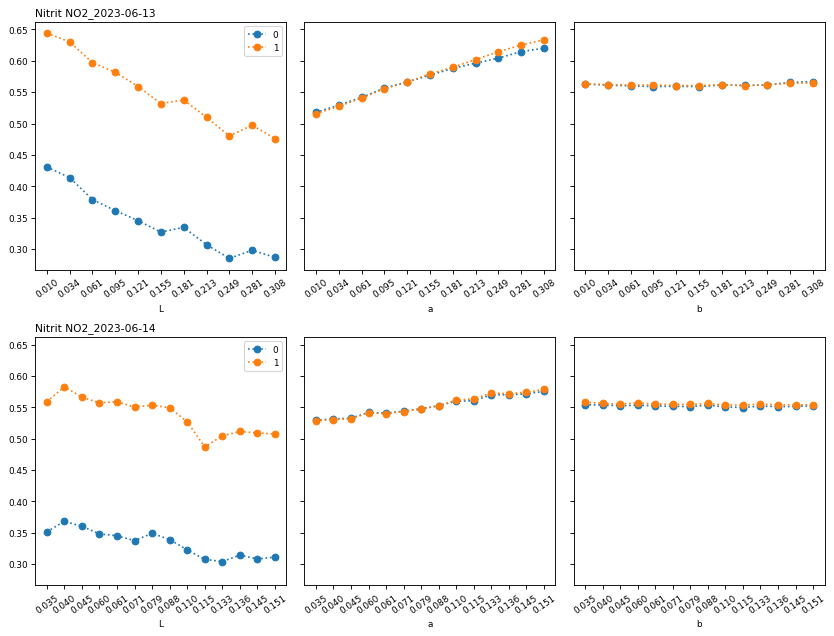

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.size"] = 8
plt.rcParams["figure.dpi"] = 80

w = 3.5
h = 4

labels = ["L","a","b"]

nrows,ncols = len(fprojects),len(list(space))
fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=[w*ncols,h*nrows],
                    dpi=plt.rcParams["figure.dpi"],sharey=True)

fprojects = data["project"].unique()

for j,fproject in enumerate(fprojects):
  
  for findex in [0,1]:
    
    frame = data[(data["project"]==fproject) & (data["index"]==findex)]  
    
    for i,c in enumerate(list(space)):
      
      cc = frame[c].to_numpy()
      label = "%d"%(findex)
      ax[j,i].plot(cc,"o:",label=label)
      
      ticks = frame["label"].to_numpy()
      ax[j,i].set_xticks(np.arange(len(ticks)))
      ax[j,i].set_xticklabels(["%.3f"%(l) for l in ticks],rotation=35)
      ax[j,i].set_xlabel("%s"%(labels[i]))
  
  ax[j,0].legend()
  ax[j,0].set_title("%s"%(fproject),x=0,ha="left")

plt.tight_layout()
if None!=pdf: pdf.savefig(plt.gcf())
plt.show()
plt.close()

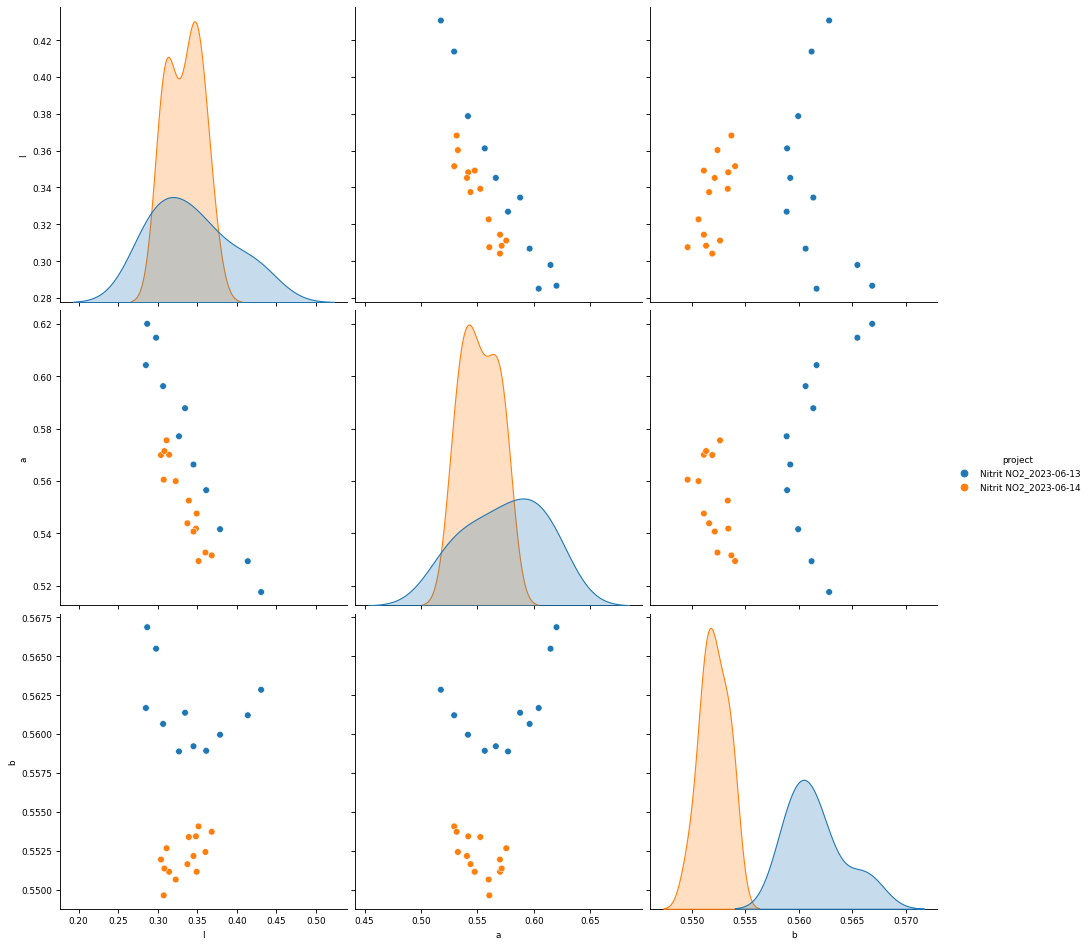

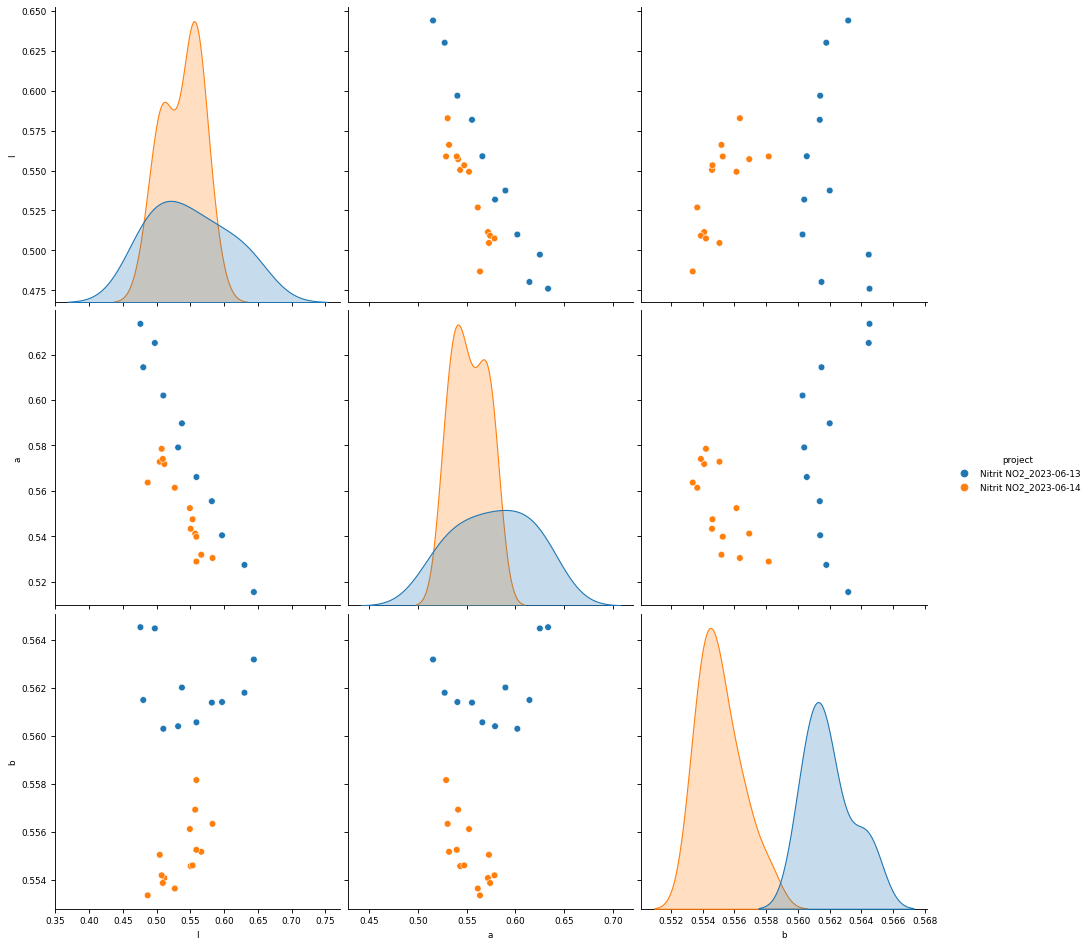

In [12]:
import seaborn as sb

for findex in [0,1]:

  grid = sb.pairplot(data[data["index"]==findex],
                    vars=list(space),
                    hue="project",
                    height=4
                    )
  
if None!=pdf: pdf.savefig(grid.fig)

In [13]:
if None!=pdf: pdf.close()

last (manual) update: 2023-08-28